<a href="https://colab.research.google.com/github/sur21/AI-Powered-precision-Irrigation-System/blob/main/SIH_TRAINED_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px


data = pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
pip install plotly_express

In [ ]:
pip install plotly

In [ ]:
print(data.info())
print("")
print(data.describe())
print("")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000   

In [ ]:
for col in data.columns:
    fig = px.histogram(data, x = col, color_discrete_sequence=['indianred'],text_auto=True)
    fig.show()

In [ ]:
fig = px.box(data.drop(columns="label"), title="Box Plots of Numerical Features")
fig.show()

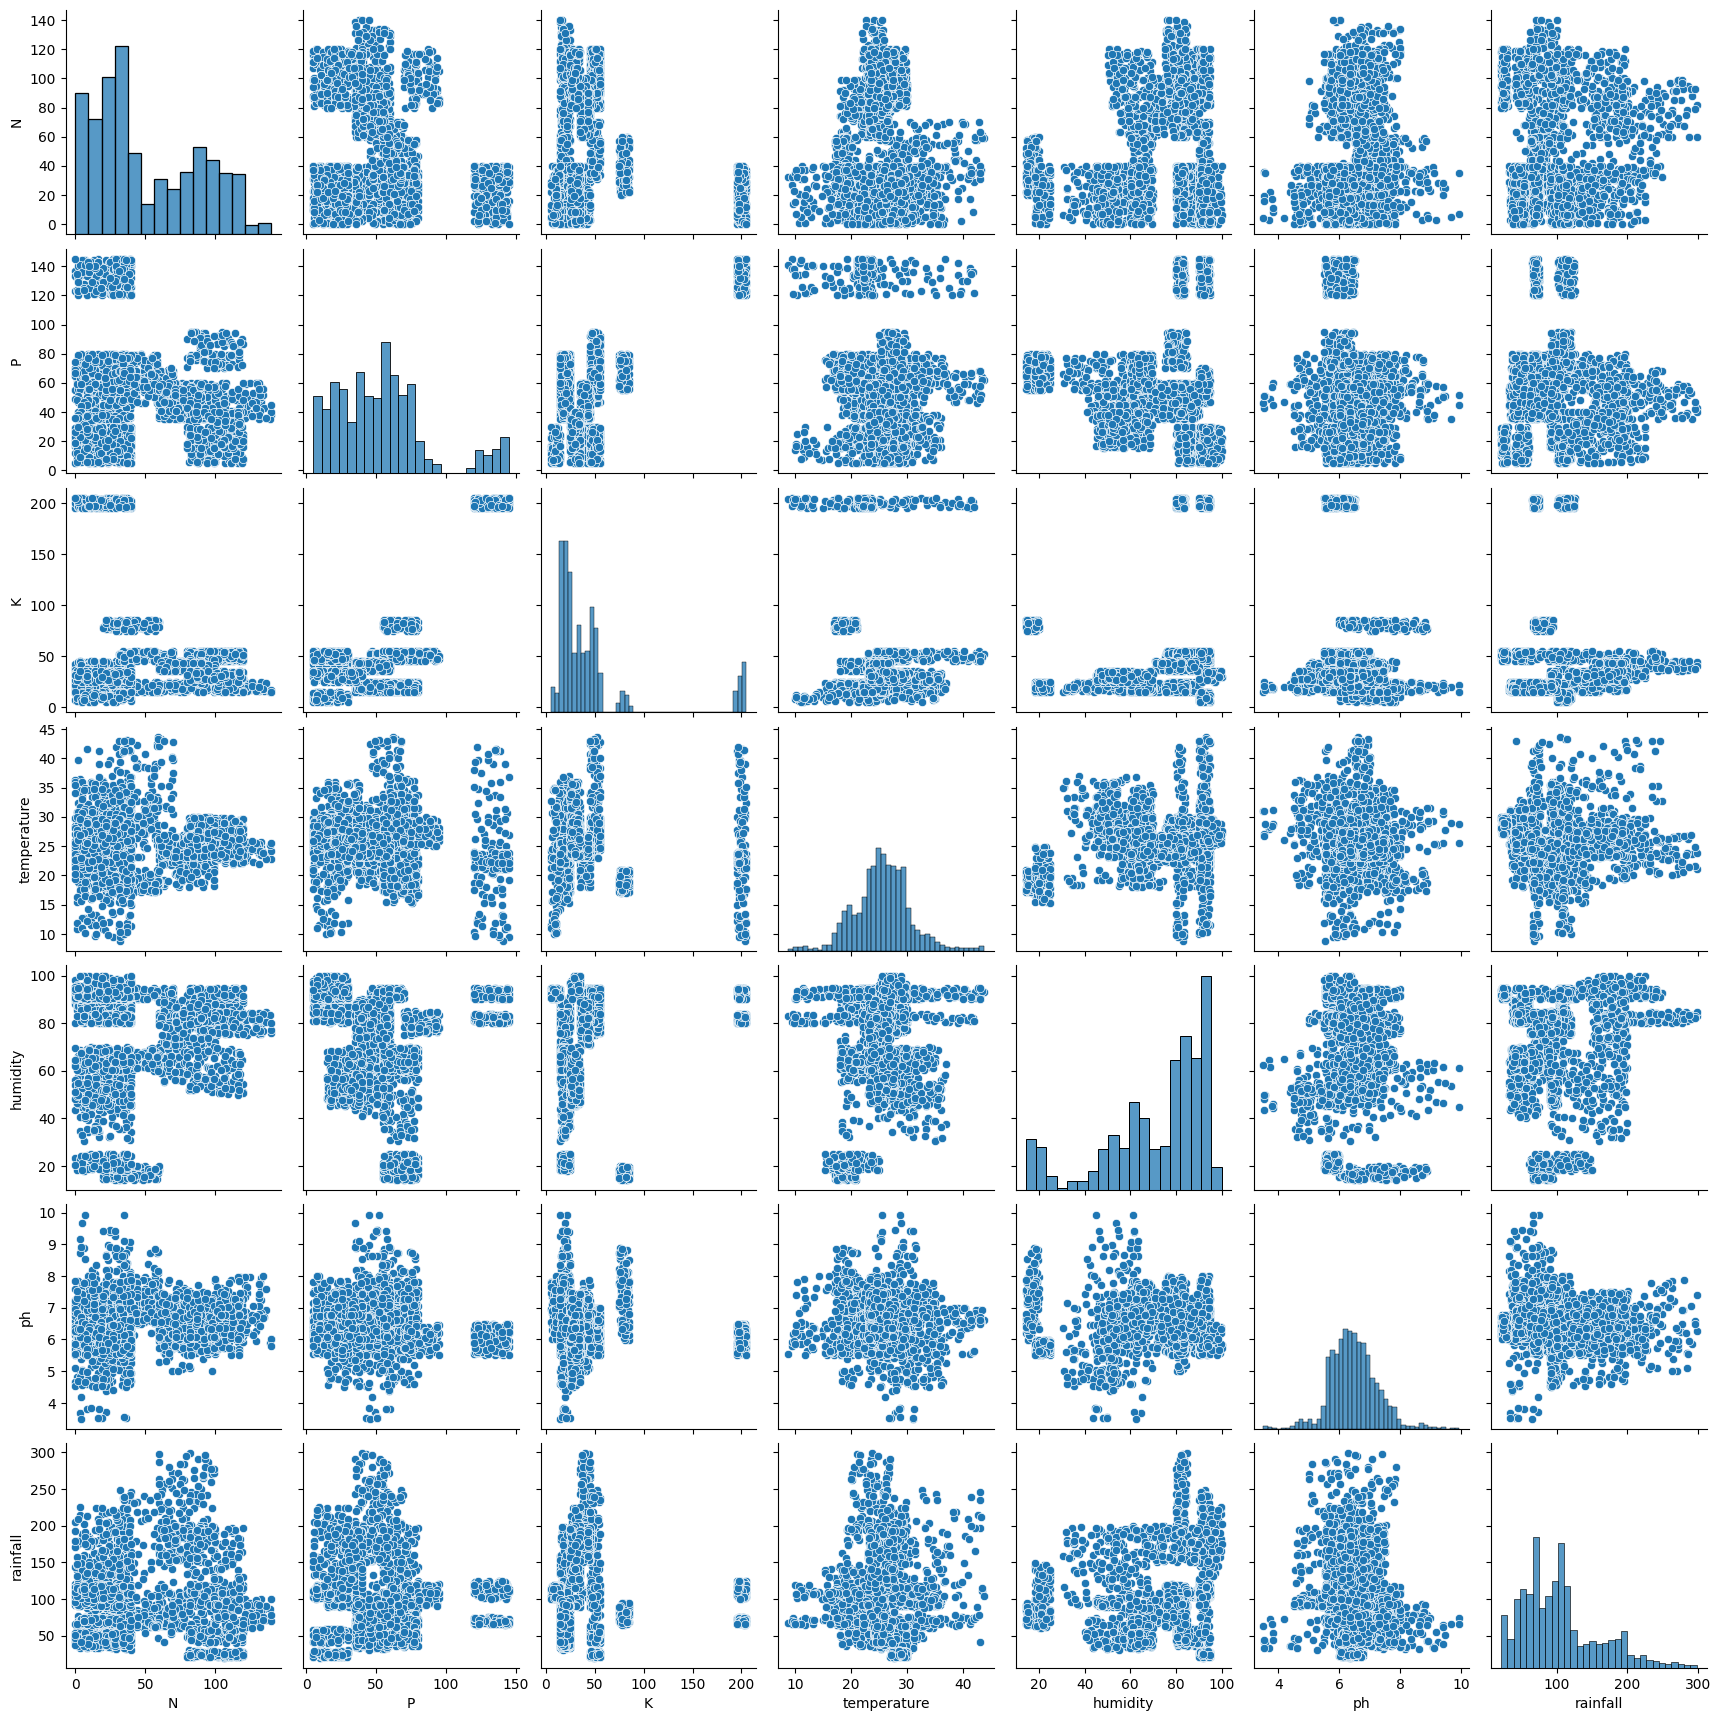

In [ ]:
sns.pairplot(data)

<Axes: >

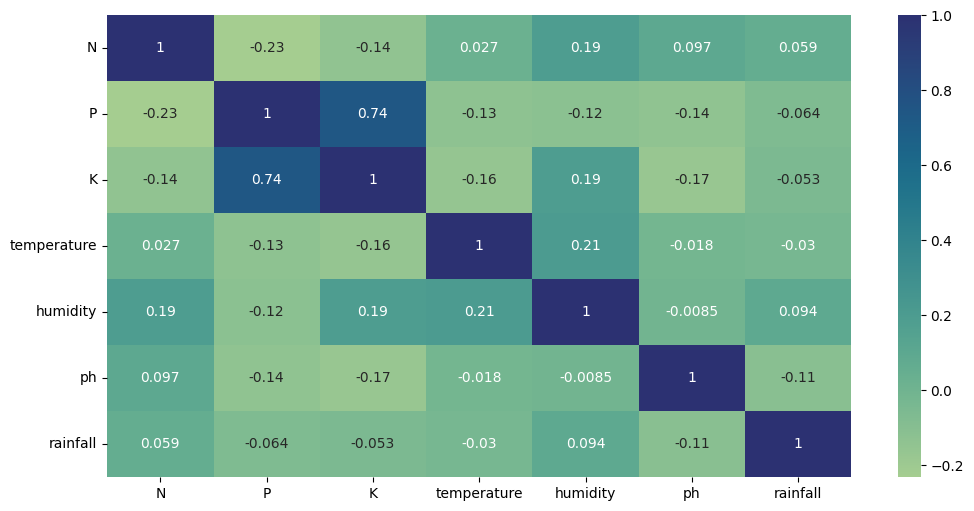

In [ ]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(data.drop(columns = 'label').corr(),annot=True, cmap="crest")

In [ ]:
label_groupby = data.groupby('label').mean().reset_index()
label_groupby

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


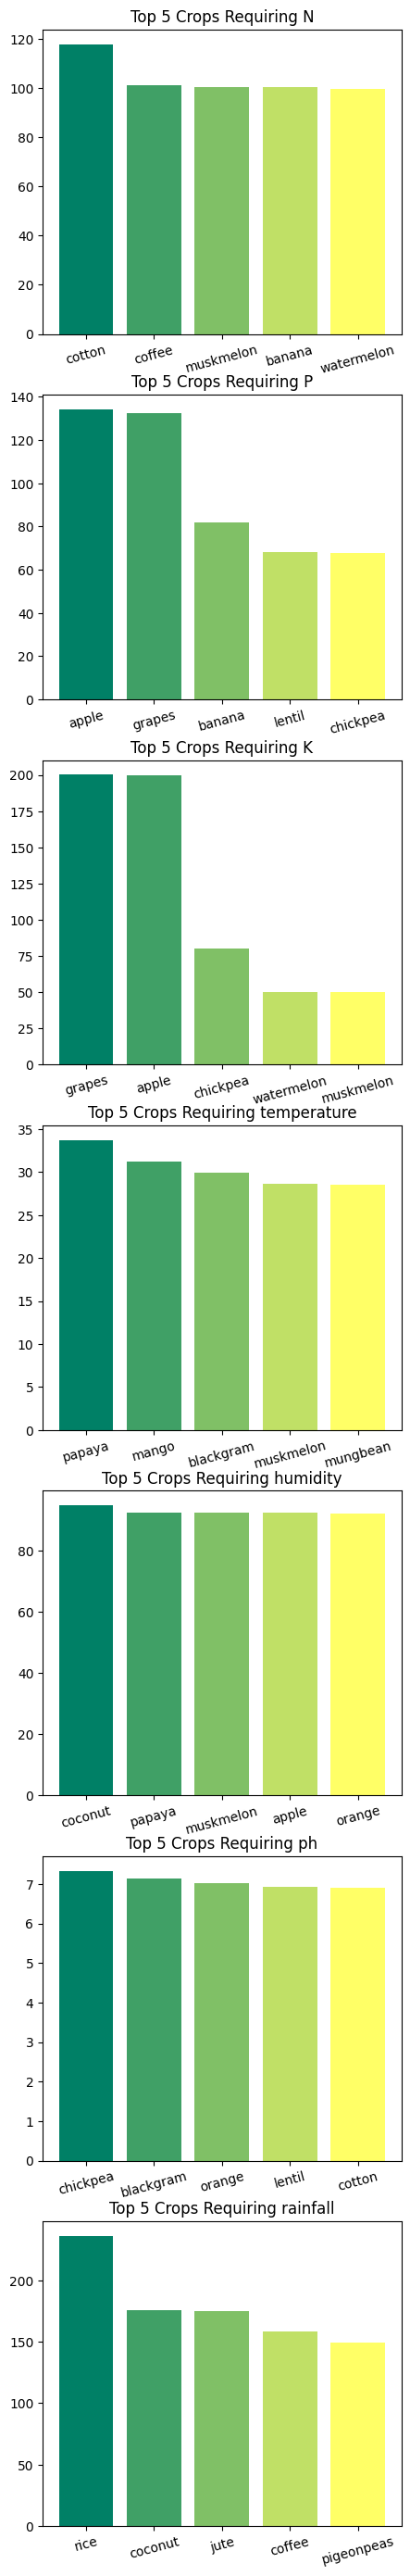

In [ ]:
import matplotlib.pyplot as plt

feature_columns = label_groupby.columns[1:]
num_rows = len(feature_columns)
num_cols = 1

colors = plt.cm.summer(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):

    top_5_crops = label_groupby.sort_values(by=feature, ascending=False)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes

    ax.bar(top_5_crops['label'], top_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Top 5 Crops Requiring {feature}')

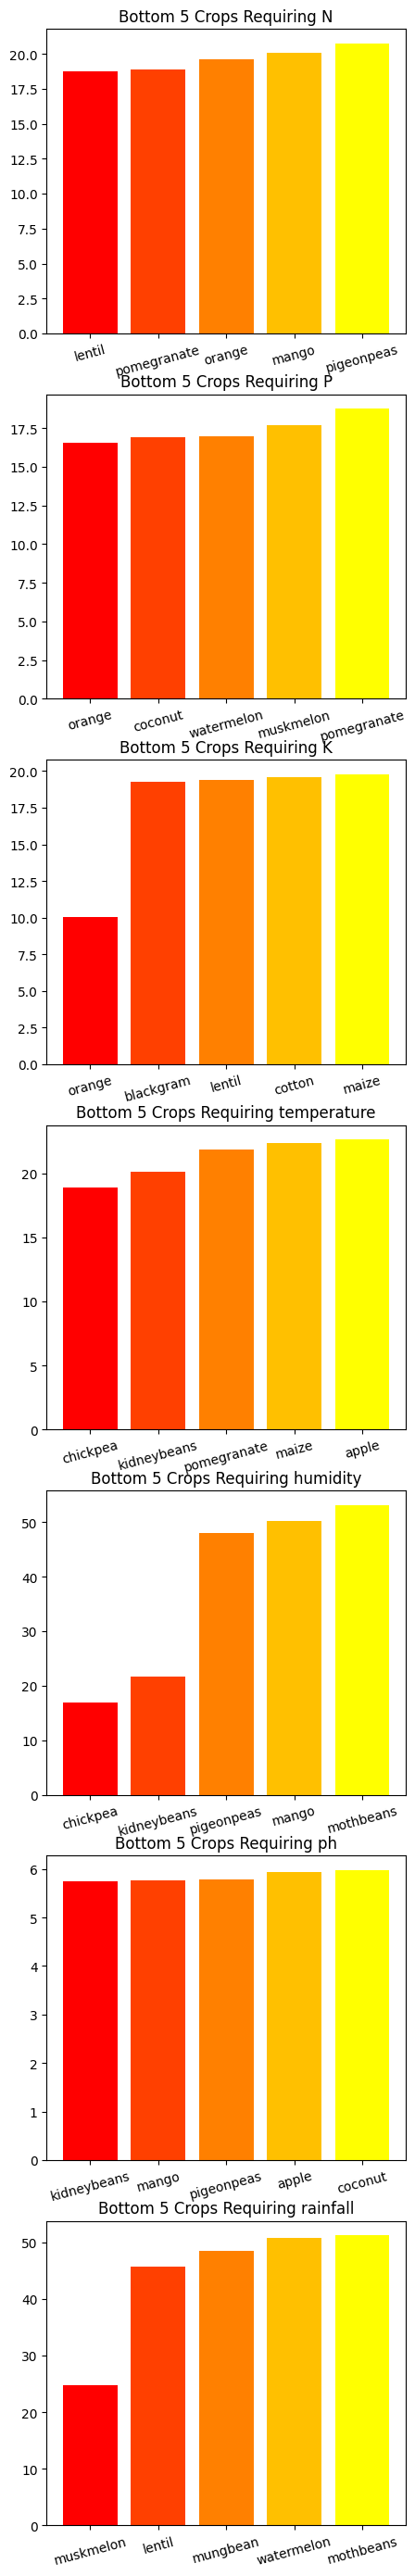

In [ ]:
import matplotlib.pyplot as plt
feature_columns = label_groupby.columns[1:]

num_rows = len(feature_columns)
num_cols = 1

colors = plt.cm.autumn(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):

    bottom_5_crops = label_groupby.sort_values(by=feature, ascending=True)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes

    ax.bar(bottom_5_crops['label'], bottom_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Bottom 5 Crops Requiring {feature}')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('label', axis =1)
y = data['label']


#sc = StandardScaler()
#X_scaled=sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.134845
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.180655
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.120030
[LightGB

LGBMClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

LightGBM Model accuracy score: 0.9758
Test set score: 0.9758


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.93      1.00      0.96        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      0.97      0.98        33
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.82      0.97      0.89        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      0.95      0.98        22
       maize       1.00      0.96      0.98        26
       mango       0.89      1.00      0.94        32
   mothbeans       0.97      1.00      0.99        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       1.00    

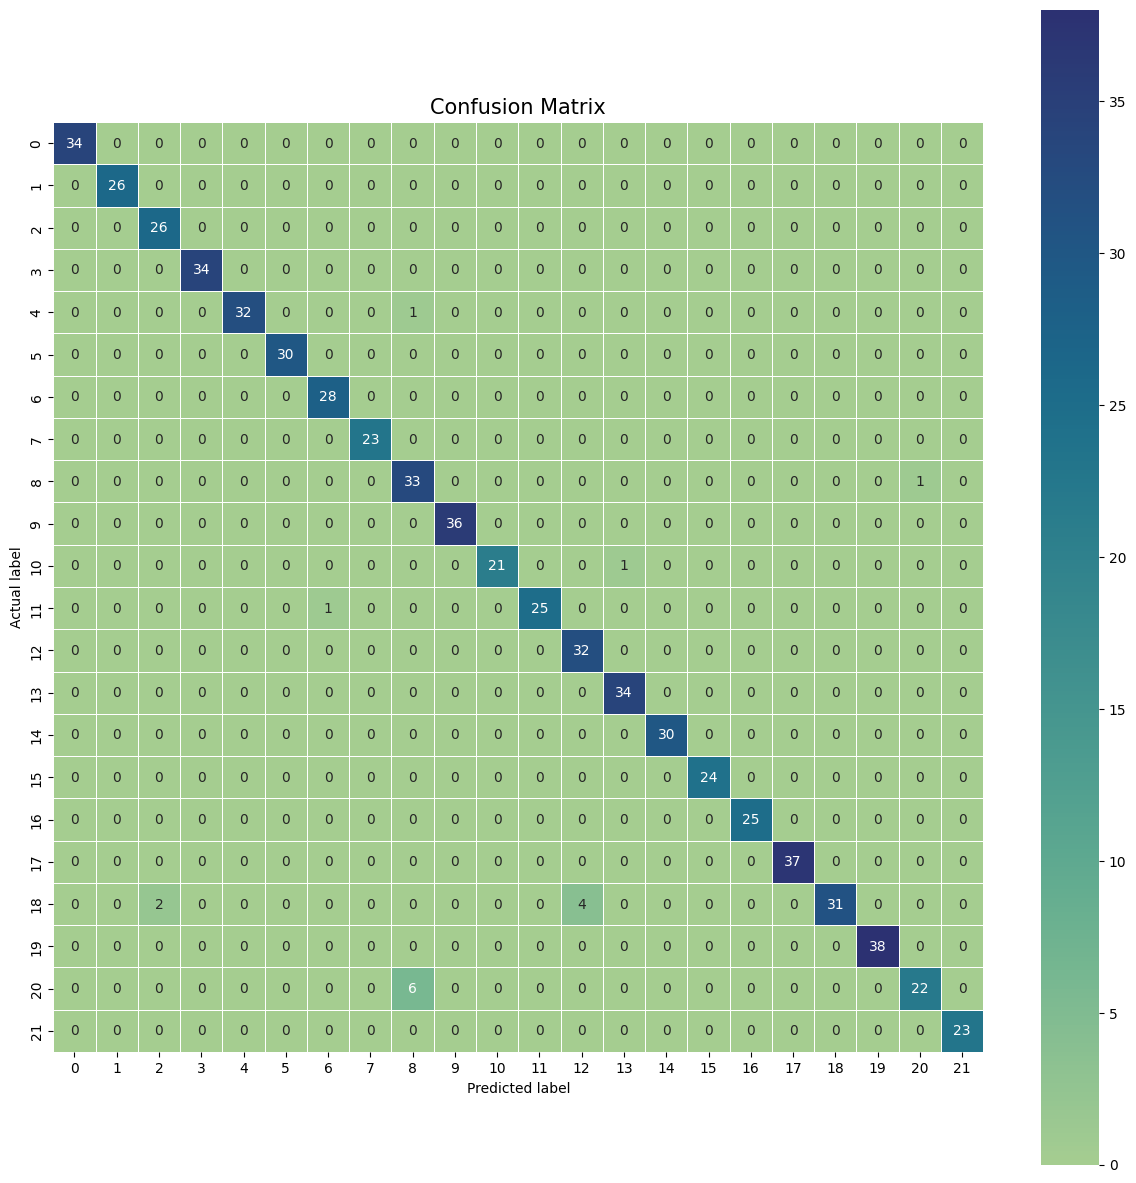

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

print('**************************')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap="crest");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [ ]:
sample_data=model.predict([[31,76,82,20.8248451,17.85057083,7.599279991,79.20509212]])
sample_data

array(['chickpea'], dtype=object)